    


### Открываем файл с данными и изучаем общую информацию

#### Импорт библиотек и настройка

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import datetime
import numpy as np
from pandas import DataFrame
from scipy import stats as st

pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 15)
pd.set_option('display.width', 80)
pd.set_option('display.float_format', '{:,.2f}'.format)

#### Написание служебных функций

##### Функция получения информации о таблице

In [ ]:
def info_data(data_frame):
    display(data_frame.head())                # первые строки таблицы
    display(data_frame.info())                # общая инф-я о таблице
    display(data_frame.isna().mean())         # доля пропусков

#### Импорт файлов

In [ ]:
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv', index_col='Unnamed: 0') # столбец Unnamed: 0 полностью повторяет целочисленный индекс от 0 до 149395 
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

#### Первый взгляд на таблицы

Посмотрим на наши исходные таблицы с точки зрения типа данных, пропусков 

In [ ]:
info_data(calls)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


None

id          0.00
call_date   0.00
duration    0.00
user_id     0.00
dtype: float64

В `calls` нет пропусков, но есть проблемы с call_date — вместо даты это строка. В дальнейшем будем это исправлять

In [ ]:
info_data(internet)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


None

id             0.00
mb_used        0.00
session_date   0.00
user_id        0.00
dtype: float64

Та же проблема с датами в `internet` — тип данных строка.

In [ ]:
info_data(messages)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


None

id             0.00
message_date   0.00
user_id        0.00
dtype: float64

Уже привычная ошибка с датами в `message_date`

In [ ]:
info_data(tariffs)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


None

messages_included       0.00
mb_per_month_included   0.00
minutes_included        0.00
rub_monthly_fee         0.00
rub_per_gb              0.00
rub_per_message         0.00
rub_per_minute          0.00
tariff_name             0.00
dtype: float64

Пропусков и проблем в таблице нет

In [ ]:
info_data(users)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


None

user_id      0.00
age          0.00
churn_date   0.92
city         0.00
first_name   0.00
last_name    0.00
reg_date     0.00
tariff       0.00
dtype: float64

В `churn_date` 92% пропусков и формат даты опять строка. С пропусками ничего не делаем, т.к. если значение пропущено, то тариф ещё действовал на момент выгрузки данных, т.е. пропуск это нормально. Тип данных в дальнейшем поменяем.


### Подготовка данных

#### Приведение данных к нужным типам

##### Даты

In [ ]:
# было много столбцов с датами, в которых тип данных был строковый
# выведем все эти столбцы через цикл for

for df in [calls, internet, messages, users]:
    for col in df.columns:
        if 'date' in col:
            print(col)

call_date
session_date
message_date
churn_date
reg_date


In [ ]:
# пять подобных столбцов, меняем значение на datetime так же через цикл


for df in [calls, internet, messages, users]:
    for col in df.columns:
        if 'date' in col:
            df[col] = pd.to_datetime(df[col])

In [ ]:
# проверяем

display(calls.dtypes)
display(internet.dtypes)
display(messages.dtypes)
display(users.dtypes)

id                   object
call_date    datetime64[ns]
duration            float64
user_id               int64
dtype: object

id                      object
mb_used                float64
session_date    datetime64[ns]
user_id                  int64
dtype: object

id                      object
message_date    datetime64[ns]
user_id                  int64
dtype: object

user_id                int64
age                    int64
churn_date    datetime64[ns]
city                  object
first_name            object
last_name             object
reg_date      datetime64[ns]
tariff                object
dtype: object

Даты стали датами, идем дальше

#### Поиск дубликатов

In [ ]:
calls.duplicated().sum()

0

In [ ]:
internet.duplicated().sum()

0

In [ ]:
messages.duplicated().sum()

0

In [ ]:
users.duplicated().sum()

0

Явных дубликатов нет, двигаемся вперед

#### Объединение таблиц

In [ ]:
# делаем технический столбец 'month' для дальнейшей группировки по месяцам

In [ ]:
# для calls предварительно округлим все минуты вверх — по правилам оператора любой разговор окргуляется до целых минут вверх
calls['duration'] = calls['duration'].apply(np.ceil)

calls['month'] = calls['call_date'].dt.month

In [ ]:
#internet['session_date_month'] = internet['session_date'].values.astype('datetime64[M]')
internet['month'] = internet['session_date'].dt.month

In [ ]:
#messages['message_date_month'] = messages['message_date'].values.astype('datetime64[M]')
messages['month'] = messages['message_date'].dt.month

In [ ]:
calls_g = (calls
           .groupby(['user_id', 'month'])['duration']
           .sum().to_frame().reset_index())

In [ ]:
internet_g = (internet
           .groupby(['user_id', 'month'])['mb_used']
           .sum().to_frame().reset_index())

In [ ]:
messages_g = (messages                                            # здесь по id сессии считаем кол-во СМС
           .groupby(['user_id', 'month'])['id']
           .count().to_frame().reset_index())

In [ ]:
# Соеденим таблицы между собой по user_id и month. Начнем с услуг

df = calls_g.merge(internet_g, on=['user_id', 'month'], how='outer')
df

,user_id,month,duration,mb_used
0,1000,5,159.00,"2,253.49"
1,1000,6,172.00,"23,233.77"
2,1000,7,340.00,"14,003.64"
3,1000,8,408.00,"14,055.93"
4,1000,9,466.00,"14,568.91"
...,...,...,...,...
3209,1489,8,NaN,"11,050.56"
3210,1489,9,NaN,"17,206.30"
3211,1489,10,NaN,"19,559.44"
3212,1489,11,NaN,"17,491.56"


In [ ]:
df = df.merge(messages_g, on=['user_id', 'month'], how='outer')
df

,user_id,month,duration,mb_used,id
0,1000,5,159.00,"2,253.49",22.00
1,1000,6,172.00,"23,233.77",60.00
2,1000,7,340.00,"14,003.64",75.00
3,1000,8,408.00,"14,055.93",81.00
4,1000,9,466.00,"14,568.91",57.00
...,...,...,...,...,...
3209,1489,8,NaN,"11,050.56",17.00
3210,1489,9,NaN,"17,206.30",32.00
3211,1489,10,NaN,"19,559.44",21.00
3212,1489,11,NaN,"17,491.56",20.00


В **df** собраны данные по всем оказанным услугам, сгруппированные по пользователю/месяцу. Остается добавить к этой таблице данные из датафрейма users и tariffs

In [ ]:
# в users интересуют только user_id (для объеденения), tariff и city(для проверки гипотезы).
# Поэтому делаем слияние по этим столбцам 

df = df.merge(users[['user_id', 'tariff', 'city']], on='user_id', how='left')
df

,user_id,month,duration,mb_used,id,tariff,city
0,1000,5,159.00,"2,253.49",22.00,ultra,Краснодар
1,1000,6,172.00,"23,233.77",60.00,ultra,Краснодар
2,1000,7,340.00,"14,003.64",75.00,ultra,Краснодар
3,1000,8,408.00,"14,055.93",81.00,ultra,Краснодар
4,1000,9,466.00,"14,568.91",57.00,ultra,Краснодар
...,...,...,...,...,...,...,...
3209,1489,8,NaN,"11,050.56",17.00,smart,Санкт-Петербург
3210,1489,9,NaN,"17,206.30",32.00,smart,Санкт-Петербург
3211,1489,10,NaN,"19,559.44",21.00,smart,Санкт-Петербург
3212,1489,11,NaN,"17,491.56",20.00,smart,Санкт-Петербург


In [ ]:
# для объединения поменяем в исходном столбце название столбца tariff_name на tariff, как в нашем сводном df

tariffs = tariffs.rename (columns= {'tariff_name': 'tariff'})
tariffs.columns

Index(['messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff'],
      dtype='object')

In [ ]:
df = df.merge(tariffs, on='tariff', how='left')

In [ ]:
df.head()

,user_id,month,duration,mb_used,id,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.00,"2,253.49",22.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,172.00,"23,233.77",60.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,340.00,"14,003.64",75.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,408.00,"14,055.93",81.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,466.00,"14,568.91",57.00,ultra,Краснодар,1000,30720,3000,1950,150,1,1


Получили таблицу для дальнейшей работы, в которой есть данные за каждый месяц для каждого пользователя

In [ ]:
# Посмотрим, есть ли в нашей общей таблице пропуски

df.isna().sum()

user_id                    0
month                      0
duration                  40
mb_used                   11
id                       497
tariff                     0
city                       0
messages_included          0
mb_per_month_included      0
minutes_included           0
rub_monthly_fee            0
rub_per_gb                 0
rub_per_message            0
rub_per_minute             0
dtype: int64

In [ ]:
# Пропуски есть. Самое большое количество — 497 в столбце id, мы смотрели там количество отправленных СМС. 
# Вполне нормально, что кто-то в эпоху мессенджеров не пользуется классическими сообщениями. То же самое можно сказать 
# о пропусках в duration и mb_used — кто-то просто не пользуется голосовыми вызовами и интернетом. Логично заполнить 
# эти пропуски нолем

df['duration'] = df['duration'].fillna(0)
df['mb_used'] = df['mb_used'].fillna(0)
df['id'] = df['id'].fillna(0)

In [ ]:
# Проверяем

df.isna().sum()

user_id                  0
month                    0
duration                 0
mb_used                  0
id                       0
tariff                   0
city                     0
messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
dtype: int64

#### Округление гигабайт

In [ ]:
df.columns

Index(['user_id', 'month', 'duration', 'mb_used', 'id', 'tariff', 'city',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute'],
      dtype='object')

Столбец `mb_used` требует внимания. По правилам оператора "Мегалайн" траффик по итогам месяца округляется до целых Гб вверх. 

In [ ]:
# переводим в Гб и округляем вверх

df['gb_used'] = df['mb_used'] / 1024
df['gb_used'] = df['gb_used'].apply(np.ceil)
df['gb_used']

0       3.00
1      23.00
2      14.00
3      14.00
4      15.00
        ... 
3209   11.00
3210   17.00
3211   20.00
3212   18.00
3213   17.00
Name: gb_used, Length: 3214, dtype: float64

Таблица полностью готова к работе. Видим кол-во сообщений, трафик и кол-во минут по каждому месяцу для каждого пользователя. Теперь можно посчитать выручку для каждого пользователя за год

#### Расчет выручки

In [ ]:
# При группировке по messages сообщения считали count()-ом по id сессии. Сейчас поменяем назавание столбца на 'messages_used', 
# просто для удобства

df = df.rename (columns= {'id': 'messages_used'})
df.columns

Index(['user_id', 'month', 'duration', 'mb_used', 'messages_used', 'tariff',
       'city', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'rub_monthly_fee', 'rub_per_gb', 'rub_per_message',
       'rub_per_minute', 'gb_used'],
      dtype='object')

In [ ]:
# В исходных данных пакет трафика предоставлен в Мб. Для удобства расчетов сделаем новый столбец 
# gb_per_month_included, в котором пакет трафика будет в Гб

df['gb_per_month_included'] = df['mb_per_month_included'] / 1024

In [ ]:
# Добавим новые столбцы для расчета стоимости минут, Гб и сообщений сверх пакета

df['minutes_up'] = (df['minutes_included'] - df['duration']).apply(lambda x: -min(0, x))
df['messages_up'] = (df['messages_included'] - df['messages_used']).apply(lambda x: -min(0, x))
df['gb_up'] = (df['gb_per_month_included'] - df['gb_used']).apply(lambda x: -min(0, x))



In [ ]:
# Теперь спокойно создаем столбец с выручкой

df['revenue'] = (df['minutes_up'] * df['rub_per_minute'] +
                 df['messages_up'] * df['rub_per_message'] +
                 df['gb_up'] * df['rub_per_gb'] +
                 df['rub_monthly_fee']
)

Есть таблица, в которой содержаться все необходимые данные для дальнейшего анализа, а именно:
1. количество сделанных звонков и израсходованных минут разговора по месяцам
2. количество отправленных сообщений по месяцам
3. объем израсходованного интернет-трафика по месяцам
4. помесячную выручку с каждого пользователя

Можно приступать к анализу данных

### Анализ данных

#### Пользование услугами

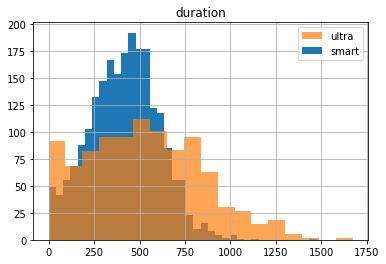

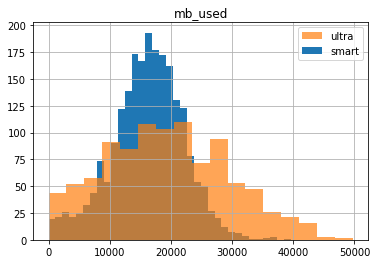

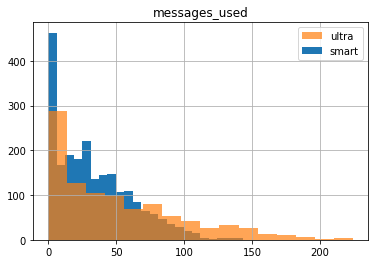

In [ ]:
# Изучим следующие параметры: объем интернет-трафика, количество минут разговора,  число сообщений 
# с помощью цикла построим гистограммы для каждого параметра по каждому тарифу

column_for_analytics = ['duration', 'mb_used', 'messages_used']
 
for col in column_for_analytics:
 
    ax = (df.query('tariff=="smart"')
          .hist(col,bins='auto',range=(df[col].min(),df[col].max()))
    
         )
 
    bx = (df.query('tariff=="ultra"')
          .hist(col,bins='auto',ax=ax,alpha=0.7,range=(df[col].min(),df[col].max()),label='smart')
         )
    plt.title(col)
    plt.legend(['ultra', 'smart'])

Распределение близкое к нормальному, только в случае с СМС смещенное влево за ось. Это объясняется большим количеством людей, не пользующимеся уже устаревающими СМС.

По гистограммам видно, что в сегменте малого потребеления минут, траффика и смс вдвое больше пользователей тарифа Smart. "Тяжелые" абоненты предпочитают Ultra.
1. Говорят больше 750 мин/мес. — в три раза больше "ультровцев"
2. Тратят более 25 Гб/мес. — "смартовцев" меньше почти в 4 раза
3. Отправляют более 100 СМС/мес. — пользователей дорогого тарифа в два раза больше

#### Средние значения использования услуг

In [ ]:
# Мы посмотрели данные по услугам на гистограммах, теперь построим сводную таблицу для всех трех услуг для того, 
# чтобы оценить расходование пакетов услуг в цифрах, заодно посчитаем дисперсию и стандартное отклонение

tariff_pivot = (df.pivot_table(index='tariff', values=['duration', 'mb_used', 'messages_used'],
                aggfunc={'duration':['mean', 'var', 'std'],
                         'mb_used':['mean', 'var', 'std'],
                         'messages_used':['mean', 'var', 'std']}))

tariff_pivot

duration                     mb_used                           \
           mean    std        var      mean       std            var   
tariff                                                                 
smart    417.93 190.31  36,219.32 16,208.39  5,870.48  34,462,496.46   
ultra    526.62 317.61 100,873.63 19,468.81 10,087.17 101,751,013.78   

       messages_used                 
                mean   std      var  
tariff                               
smart          33.38 28.23   796.81  
ultra          49.36 47.80 2,285.27

Среднее пользователей Ultra по минутам, трафику и смс больше в 1.3, 1.2 и 1.6 раза.

### Проверка гипотез

#### Гипотеза о равенстве выручек пользователей тарифов «Ультра» и «Смарт» 

В рамках исследования нам нужно проверить гипотезу, что выручка пользователей разных тарифов отличается

Зададим нулевую гипотезу

_H₀: средняя выручка абнонентов Smart и Ultra равна_

Альтернативна гипотеза — утверждение, которое принимается верным, если отбрасывается H₀

_H₁: средняя выручка абнонентов Smart и Ultra  не равна_

Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны


In [ ]:
alpha = .05                       # зададим критический уровень статистической значимости

In [ ]:
# Делаем две выборки потарифно

smart = df.query('tariff == "smart"')['revenue']
ultra = df.query('tariff == "ultra"')['revenue']

In [ ]:
# Посмотрим на размер выборок

print('Размер выборки smart:', len(smart))
print('Размер выборки ultra:', len(ultra))

Размер выборки smart: 2229
Размер выборки ultra: 985


In [ ]:
# Посмотрим на дисперсии выборок. Посокольку имеем дело с выборками, параметр ddof устанавливаем равным 1

print('Дисперсия выборки smart:', smart.var(ddof=1))
print('Дисперсия выборки ultra:', ultra.var(ddof=1))

Дисперсия выборки smart: 669785.7080064242
Дисперсия выборки ultra: 141516.7450786183


Дисперсии различаются

In [ ]:
# Одна из формулировок центральной предельной теоремы (сокр. ЦПТ) звучит так: 
# если в выборке достаточно наблюдений, выборочное среднее распределено нормально вокруг среднего генеральной совокупности
# У нас достаточно большие выборки, а Если значений в выборке много (30 и больше), 
# то распределение Стьюдента настолько близко к нормальному,спокойно применяем t-тест

results = st.ttest_ind(smart, ultra, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


In [ ]:
# Тест показал, средняя выручка на тарифах различается
# Проверим 

df.groupby('tariff')['revenue'].mean()

tariff
smart   1,289.97
ultra   2,070.15
Name: revenue, dtype: float64

_Вывод: средняя выручка ощутимо (почти в 2 раза) больше на тарифе Ultra_

#### Гипотеза о средняя выручке пользователей из Москвы

Проверим гипотезу о неравенстве выручке пользователей из Москвы выручке пользователей из других регионов

Зададим нулевую гипотезу

_H₀: средняя выручка абнонентов из Москвы и других регионов равна_

Альтернативна гипотеза — утверждение, которое принимается верным, если отбрасывается H₀

_H₁: средняя выручка абнонентов из Москвы и других регионов не равна_

Такая альтернативная гипотеза называется двусторонней, потому что есть возможное отклонение и в большую, и в меньшую стороны



In [ ]:
alpha = .05                       # зададим критический уровень статистической значимости

In [ ]:
# Делаем две выборки потарифно

msc = df.query('city == "Москва"')['revenue']
other = df.query('city != "Москва"')['revenue']

In [ ]:
# Посмотрим на размер выборок

print('Размер выборки msc:', len(msc))
print('Размер выборки other:', len(other))

Размер выборки msc: 611
Размер выборки other: 2603


In [ ]:
# Посмотрим на дисперсии выборок. Посокольку имеем дело с выборками, параметр ddof устанавливаем равным 1

print('Дисперсия выборки msc:', msc.var(ddof=1))
print('Дисперсия выборки other:', other.var(ddof=1))

Дисперсия выборки msc: 565636.467011886
Дисперсия выборки other: 654137.6285218114


Дисперсии различаются

In [ ]:
# Одна из формулировок центральной предельной теоремы (сокр. ЦПТ) звучит так: 
# если в выборке достаточно наблюдений, выборочное среднее распределено нормально вокруг среднего генеральной совокупности
# У нас достаточно большие выборки, а Если значений в выборке много (30 и больше), 
# то распределение Стьюдента настолько близко к нормальному,спокойно применяем t-тест

results = st.ttest_ind(msc, other, equal_var=False)
print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5257376663729298
Не получилось отвергнуть нулевую гипотезу


In [ ]:
# Тест показал, средняя выручка на тарифах не различается
# Проверим 

print(df[df['city'] == 'Москва']['revenue'].mean())
print(df[df['city'] != 'Москва']['revenue'].mean())

1546.7135842880523
1524.9362274298885


Разницы в тратах между столицей и регионами нет, гипотеза не подтвердилась, это также видно со средними значенями


### Выручка (вне ТЗ)

In [ ]:
# Еще сгруппируем данные по тарифу и посмотрим медиану по выручке на каждом тарифе

df.groupby('tariff')['revenue'].median()

tariff
smart   1,023.00
ultra   1,950.00
Name: revenue, dtype: float64

In [ ]:
# то же самое, но среднее

df.groupby('tariff')['revenue'].mean()

tariff
smart   1,289.97
ultra   2,070.15
Name: revenue, dtype: float64

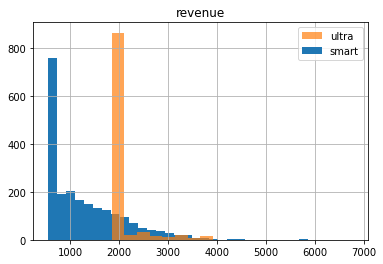

In [ ]:
# посмотрим на гистограмму выручки в разрезе двух тарифов

ax = (df.query('tariff=="smart"')
          .hist('revenue',bins='auto',range=(df['revenue'].min(),df['revenue'].max()))   
         )
 
bx = (df.query('tariff=="ultra"')
          .hist('revenue',bins='auto',ax=ax,alpha=0.7,range=(df['revenue'].min(), df['revenue'].max()),label='smart')
         )
plt.title('revenue')
plt.legend(['ultra', 'smart']);

Еще один важный момент — какая часть пользователей обоих тарифов остаются строго в рамках предоставленного пакета услуг?

In [ ]:
# Сколько "ультровцев" не выходят за пределы абон платы

temp_u = (len(df.query('tariff == "ultra" and minutes_up <= 0 and messages_up <=0 and gb_up').groupby('user_id')) / 
 len(df.query('tariff == "ultra"'))
)

print("Пользователей тарифа Ultra не выходят за рамки пакета: {:.2%}".format(temp_u))


Пользователей тарифа Ultra не выходят за рамки пакета: 4.37%


In [ ]:
# Сколько "смартовцев" не выходят за пределы абон платы

temp_s = (len(df.query('tariff == "smart" and minutes_up <= 0 and messages_up <=0 and gb_up').groupby('user_id')) / 
 len(df.query('tariff == "smart"'))
)

print("Пользователей тарифа Smart не выходят за рамки пакета: {:.2%}".format(temp_s))

Пользователей тарифа Smart не выходят за рамки пакета: 8.03%


In [ ]:
# Проверим суммарную выручку по тарифам

df.groupby('tariff')['revenue'].sum()

tariff
smart   2,875,351.00
ultra   2,039,100.00
Name: revenue, dtype: float64

8% "смартовцев" ограничиваются предложенным пакетом — на "Ультре" цифра в два раза ниже, 4,37%.



### **Общий вывод**

Пользователей более доступного тарифа Smart в 2.3 раза больше. При этом общая выручка пользователей Smart всего в 1.4 превышает таковую по тприфу Ultra.
![image-2.png](attachment:image-2.png)
Одна из целей исследования — проверка гипотезы равенства выручки по двум тарифам. Гипотеза подтвердилась — средний пользователь тарифа Ultra приносит оператору в среднем почти в 2 раза больше выручки. Ожидаемо основная масса пользователей тратит сумму, близкую к абонентской плате, это хорошо видно на гистограмме.
![image.png](attachment:image.png)

Вторая гипотеза о неравенстве выручки от пользователей из Москвы и других городдов наоборот не подтвердилась, там паритет.
![image-3.png](attachment:image-3.png)

В плюс Ultra идет меньшее количество людей, ограничившееся только включенным пакетом — лишь 4% не выходят за рамки одного из пакетов минут, Гб и смс. На Smart таких абонентов 8%.

Но есть существенная угроза для бизнеса оператора. Давайте посмотрим на пакет услуг в тарифе Ultra:
- Ежемесячная плата: 1950 рублей
- Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

А теперь на потребление этих услуг.
Минуты:
![image-4.png](attachment:image-4.png)
Среднее значение **545 минут**

Трафик:
![image-5.png](attachment:image-5.png)
**Среднее значение 19.6 ГБ**

СМС:
![image-6.png](attachment:image-6.png)
**Среднее значение 61 шт.**

Пользователи Ultra в большинстве своем выходят за рамки пакета по одному из параметров (96% от всех пользователей Ultra). Но большАя часть не реализует все три параметра. Особенно это заметно по уже устаревшим СМС — в среднем 61 из 1000, кто-то ими не пользуется вообще. Касаемо голосовых вызовов — среднее 545 минут из 3000, при этом мало кто тратит более 1500 минут.

Чем это опасно? Грамотные пользователи могут заметить большой остаток пакетов услуг на конец расчетного периода и с целью экономии принять одно из двух решений:
1. Уйти на тариф Smart
2. Уйти к другому оператору

При любом из этих решений бизнес потеряет деньги.

Основная задача исследования — сделать вывод, какой тариф лучше. Безусловно, _для "Мегалайна" с точки зрения выручки интереснее и перспективнее тариф Ultra_. На него надо делать маркетинговый упор, продвигать и выделять в отдельную категорию премиум-обслуживания. Но при этом помнить о параметрах тарифа, которые средний пользователь не реализует, а потому существует высокая вероятность оттока. Для избежания этого можно сделать:
1. Ввести промежуточный тариф, условный Smart+, по размеру пакетов находящийся посередине (с менее выгодным соотношением услуга/цена, т.е. удельная стоимост минут/Гб/СМС больше, но в целом ежемесячные платежи меньше)
2. Добавить тариф-конструктор, где пользователь сам выбирает параметры тарифа.
